To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 2 - Precision, Recall, ROC

## 2.1

**Answer:**
The ROC curve plots true positive vs false positive rate at different thresholds. $\text{True positive rate} = \frac{tp}{tp + fn}$ while $\text{False positive rate} = \frac{fp}{fp + tn}$. Since false positive rate is affected by true negatives, true negatives matter for the ROC curve. The PR curve plots precision vs recall. $\text{Precision} = \frac{tp}{tp + fp}$ while $\text{Recall} = \frac{tp}{tp + fn}$. Since neither precision nor recall are affected by true negatives, it doesn't matter for the PR curve. Each point on the ROC curve corresponds to a specific decision threshold. Changing this threshold (a different point on the ROC curve) will affect the number of true positives, false positives, true negatives, and false negatives. Once these 4 values change, the precision and recall values will change. Thus for each threshold, there is a unique pair of precision and recall values and as a result a unique point on the PR curve.

## 2.2

**Link to dataset:**
https://www.openml.org/search?type=data&status=active&sort=runs&qualities.NumberOfClasses=%3D_2&id=37

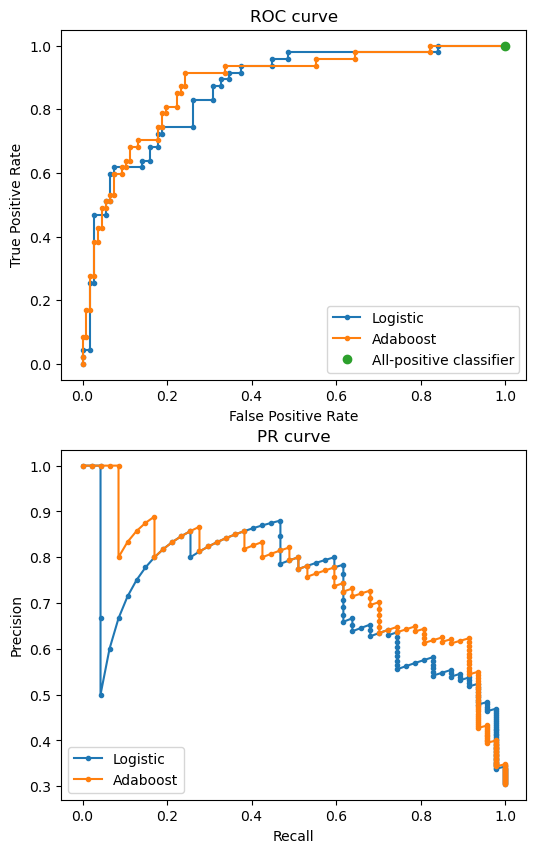

In [3]:
# your code starts here
# your code starts here
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

dataset = fetch_openml(data_id=37, parser='auto')

# Store the feature data
X = dataset.data
# store the target data
y = pd.get_dummies(dataset.target, drop_first=True, dtype=int).iloc[:, 0]
# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle= True)

from sklearn.linear_model import LogisticRegression

# Instantiate a logistic regression model, set the max_iter to 3000
logreg = LogisticRegression(max_iter=3000)
# fit the logreg instance to the dataset
logreg.fit(X_train, y_train)
logreg_test_probs = logreg.predict_proba(X_test)[:,1]

from sklearn.ensemble import AdaBoostClassifier

adab = AdaBoostClassifier(n_estimators=100, random_state=0)
adab.fit(X_train, y_train)
adab_test_probs = adab.predict_proba(X_test)[:,1]

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(6, 10))

from sklearn.metrics import roc_curve, precision_recall_curve

plt.sca(axs[0])

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, logreg_test_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

ad_fpr, ad_tpr, thresholds = roc_curve(y_test, adab_test_probs)
plt.plot(ad_fpr, ad_tpr, marker='.', label='Adaboost')

plt.plot(1, 1, 'o', label='All-positive classifier')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.title('ROC curve')

plt.sca(axs[1])

precision, recall, thresholds = precision_recall_curve(y_test, logreg_test_probs)
plt.plot(recall, precision, marker='.', label='Logistic')

precision, recall, thresholds = precision_recall_curve(y_test, adab_test_probs)
plt.plot(recall, precision, marker='.', label='Adaboost')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc='lower left')
plt.title('PR curve')

plt.show()


array([0.47925719, 0.47954876, 0.47973669, 0.48053527, 0.48100653,
       0.4817527 , 0.48240278, 0.48255641, 0.4830553 , 0.48360019,
       0.48422398, 0.48489112, 0.48512069, 0.48535051, 0.48539627,
       0.48558396, 0.48604354, 0.48671216, 0.48697586, 0.48708052,
       0.4872034 , 0.48729618, 0.48754671, 0.48815581, 0.48836632,
       0.48844883, 0.48858725, 0.48870424, 0.48884328, 0.48885674,
       0.48898671, 0.48899891, 0.48920813, 0.4895049 , 0.49006824,
       0.49010513, 0.49034761, 0.49045724, 0.49067285, 0.49104905,
       0.49110723, 0.49117653, 0.49132479, 0.49137385, 0.49186272,
       0.49193435, 0.49210468, 0.49212359, 0.49227527, 0.49244523,
       0.49268385, 0.49297601, 0.49344031, 0.49352654, 0.49370436,
       0.4939025 , 0.4943325 , 0.49445114, 0.49459276, 0.49460458,
       0.49479335, 0.49488596, 0.49515556, 0.49520062, 0.49523924,
       0.49542561, 0.49546802, 0.4954971 , 0.49549876, 0.49553523,
       0.49560126, 0.49564058, 0.49566142, 0.49574048, 0.49580

**Answer:**